In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotilb inline

UsageError: Line magic function `%matplotilb` not found.


In [4]:
df = pd.read_csv("master.csv")

In [7]:
print(df.shape)


df.head()

(27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [8]:
df_portugal = df[df.country == 'Portugal'].copy()

print(df_portugal.shape)

df_portugal.head()

(324, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
19356,Portugal,1985,male,75+ years,89,160554,55.43,Portugal1985,0.676,"27,118,476,174",2912,G.I. Generation
19357,Portugal,1985,male,55-74 years,245,805542,30.41,Portugal1985,0.676,"27,118,476,174",2912,G.I. Generation
19358,Portugal,1985,male,35-54 years,185,1103803,16.76,Portugal1985,0.676,"27,118,476,174",2912,Silent
19359,Portugal,1985,female,75+ years,39,288221,13.53,Portugal1985,0.676,"27,118,476,174",2912,G.I. Generation
19360,Portugal,1985,male,25-34 years,87,703271,12.37,Portugal1985,0.676,"27,118,476,174",2912,Boomers


In [9]:
print('--> Mundial:')
display(df.isnull().sum())

print('\n', '--.' * 10, '\n')

print('--> Portugal:')
display(df_portugal.isnull().sum())

--> Mundial:


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


 --.--.--.--.--.--.--.--.--.--. 

--> Portugal:


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          216
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

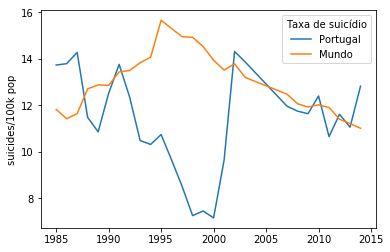

In [10]:
years = df_portugal.year.unique()    
suicides_portugal_mean = df_portugal.groupby('year')['suicides/100k pop'].mean()
suicides_world_mean = df.groupby('year')['suicides/100k pop'].mean()

suicides_world_mean.drop(2012, inplace=True)
suicides_world_mean.drop(2013, inplace=True)
suicides_world_mean.drop(2014, inplace=True)
suicides_world_mean.drop(2015, inplace=True)
suicides_world_mean.drop(2016, inplace=True)

ax = sns.lineplot(x=years, y=suicides_portugal_mean, label='Portugal')
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo')
plt.legend(title="Taxa de suicídio")
plt.show()

In [11]:
suicides_world_mean

year
1985    11.826198
1986    11.423333
1987    11.644213
1988    12.709405
1989    12.879071
1990    12.862956
1991    13.438880
1992    13.498564
1993    13.833705
1994    14.073272
1995    15.662671
1996    15.305422
1997    14.954361
1998    14.926920
1999    14.532038
2000    13.941328
2001    13.519138
2002    13.786550
2003    13.205019
2004    12.481944
2005    12.068442
2006    11.927461
2007    12.025339
2008    11.907686
2009    11.400787
2010    11.215900
2011    11.015349
Name: suicides/100k pop, dtype: float64

In [12]:
suicides_portugal_mean

year
1985    13.735000
1986    13.794167
1987    14.277500
1988    11.479167
1989    10.860000
1990    12.517500
1991    13.763333
1992    12.358333
1993    10.485833
1994    10.318333
1995    10.744167
1996     9.647500
1997     8.515000
1998     7.255000
1999     7.455000
2000     7.156667
2001     9.644167
2002    14.319167
2003    13.871667
2007    11.962500
2008    11.751667
2009    11.641667
2010    12.403333
2011    10.655000
2012    11.616667
2013    11.060833
2014    12.824167
Name: suicides/100k pop, dtype: float64

In [13]:

table = pd.pivot_table(df_portugal, values='suicides_no', index=['year'], columns=['age'])


column_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
table = table.reindex(column_order, axis=1)

table.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,5.0,61.0,59.0,131.0,171.5,64.0
1986,4.5,46.0,48.5,134.5,163.5,73.5
1987,2.5,52.0,61.5,129.5,152.0,82.5
1988,3.5,40.5,44.0,105.0,154.0,62.5
1989,2.0,38.0,47.0,77.0,142.0,67.5


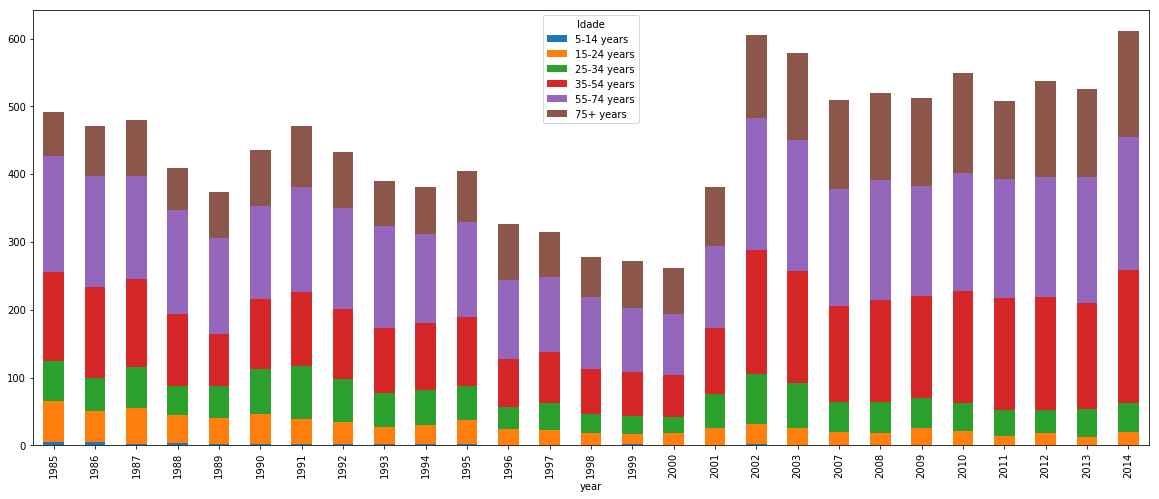

In [14]:
table.plot.bar(stacked=True, figsize=(20,8))
plt.legend(title="Idade");

In [15]:
grouped= df_portugal.groupby(['age'])['suicides_no'].sum()

In [16]:
grouped

age
15-24 years    1505
25-34 years    2590
35-54 years    6535
5-14 years       85
55-74 years    8189
75+ years      5157
Name: suicides_no, dtype: int64

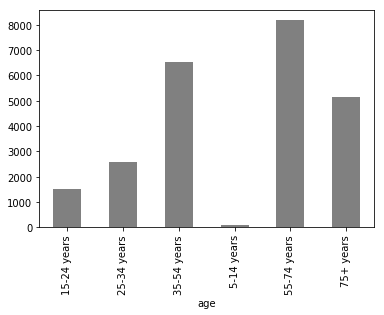

In [17]:
grouped.plot.bar(color='gray')

In [18]:
table[['25-34 years']].loc[2014]
table.loc[2014] / table.loc[2014].sum()

age
5-14 years     0.001637
15-24 years    0.029460
25-34 years    0.070376
35-54 years    0.321604
55-74 years    0.322422
75+ years      0.254501
Name: 2014, dtype: float64

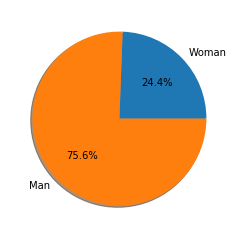

In [19]:
man_woman = df_portugal.groupby('sex').suicides_no.sum() / df_portugal.groupby('sex').suicides_no.sum().sum()

plt.pie(man_woman, labels=['Woman', 'Man'], autopct='%1.1f%%', shadow=True);

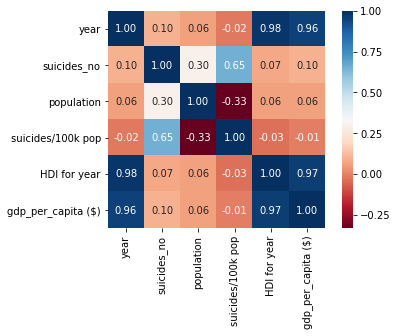

In [20]:
corr = df_portugal.corr()
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

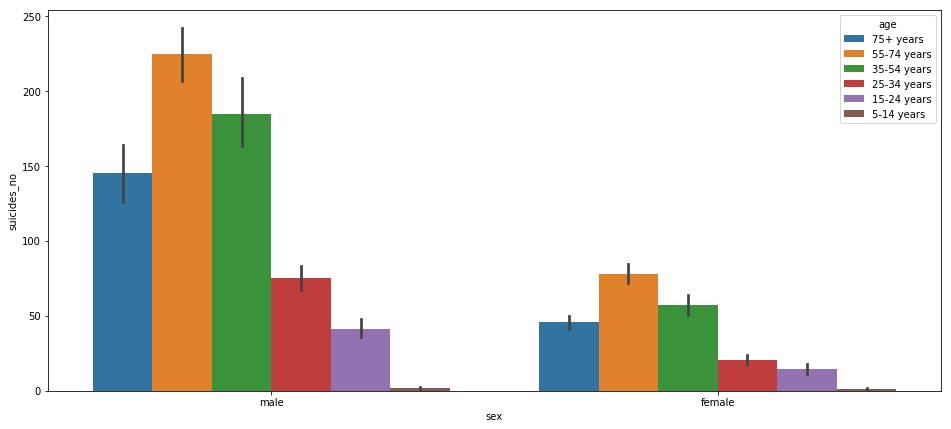

In [21]:
plt.figure(figsize=(16,7))
bar_age = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = df_portugal)

C:\Users\Di\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Di\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<function matplotlib.pyplot.show(*args, **kw)>

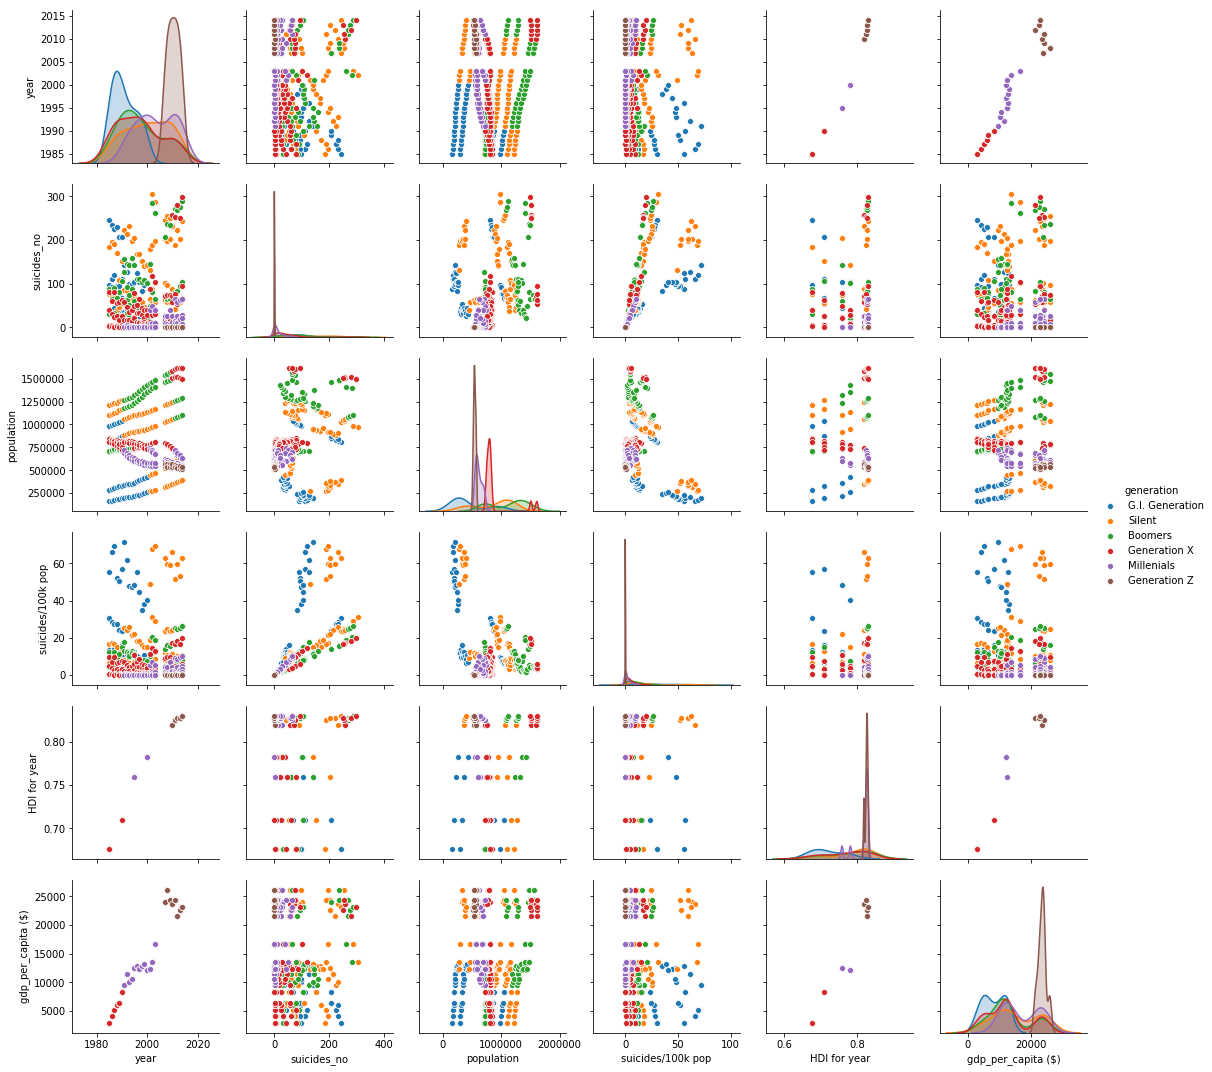

In [22]:
sns.pairplot(df_portugal, hue='generation')
plt.show

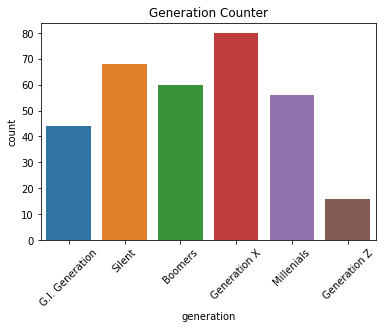

In [23]:
sns.countplot(df_portugal.generation)
plt.title('Generation Counter')
plt.xticks(rotation=45)
plt.show()

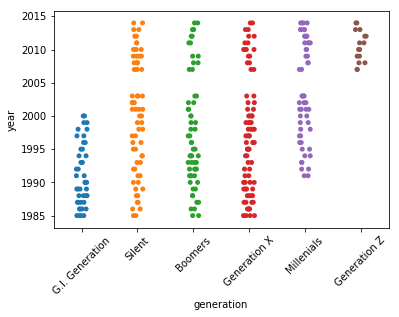

In [24]:
sns.stripplot(x="generation",y='year',data=df_portugal)
plt.xticks(rotation=45)
plt.show()

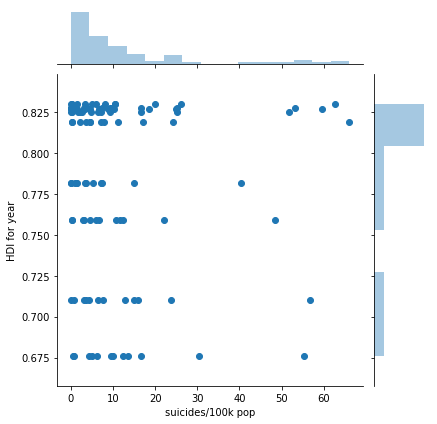

In [42]:
sns.jointplot('suicides/100k pop','HDI for year', df_portugal, kind='scatter')

C:\Users\Di\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


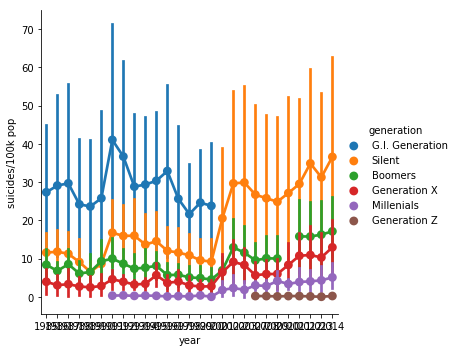

In [44]:
sns.factorplot('year','suicides/100k pop',hue='generation', data=df_portugal)

In [ ]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

poll_df.head()

In [ ]:
df_portugal.plot(x='year',y=['','Romney','Undecided'], linestyle='',marker='o')